# **Klasifikasi Evaluasi Mobil pada Dataset Car Evaluations dengan Metode Naive Bayes**

## *Tujuan Analisis*

1.	Mengevaluasi kinerja algoritma naive bayes pada klasifikasi evaluasi mobil.
2.	Mengidentifikasi faktor-faktor penentu yang memiliki dampak signifikan pada hasil klasifikasi evaluasi mobil menggunakan metode Naive Bayes.
3.	Melakukan validasi model terhadap dataset yang berbeda untuk memastikan kemampuan generalisasi dan keandalan hasil klasifikasi.

## *Data Understanding*

**Deskripsi Data**

data yang digunakan di ambil dari website UCI REPOSITORY : https://archive.ics.uci.edu/dataset/19/car+evaluation
dengan 7 kolom  dan memiliki 1728 baris data, sesuai dengan deskripsi dataset pada UCI dijelaskan dataset car evaluation berupa dataset kategorikal dan tidak memiliki missing value.
1. **Jumlah Sampel:**<br>
    Dataset "car evaluation" terdiri dari 7 kolom (6 fitur ciri dan Label) serta dataset car evaluation memiliki 1728 baris data secara keseluruhan, atau jika berdasarkan kelas, unacc = 1210, acc = 384, good = 69, vgood = 65.

2. **One-Hot Encoding:**<br>
   Semua Fitur pada dataset car evaluation bertype data kategorikal, maka dari itu akan dilakukan one-hot encoding pada preprocessing, one-hot encoding merupakan sebuah metode representasi data kategorikal di dalam bentuk yang dapat diolah oleh model pembelajaran mesin.

**FITUR-FITUR PADA DATASET**

1. buying: vhigh, high, med, low.
2. maint: vhigh, high, med, low.
3. doors: 2, 3, 4, 5more.
4. persons: 2, 4, more.
5. lug_boot: small, med, big.
6. safety: low, med, high.
7. label: unacc, acc, good, vgood

**Penjelasan fitur**
1. buying (pembelian): Tingkat kelas mobil berdasarkan harga pembelian, dengan nilai yang mungkin termasuk "vhigh" (sangat tinggi), "high" (tinggi), "med" (sedang), dan "low" (rendah).

2. maint (pemeliharaan): Tingkat kelas mobil berdasarkan biaya pemeliharaan, dengan nilai yang mungkin sama seperti pada atribut pembelian.

3. doors (jumlah pintu): Jumlah pintu pada mobil, dengan nilai yang mungkin termasuk 2, 3, 4, atau "5more" (lebih dari 5 pintu).

4. persons (kapasitas penumpang): Kapasitas penumpang pada mobil, dengan nilai yang mungkin termasuk 2, 4, atau "more" (lebih dari 4 penumpang).

5. lug_boot (kapasitas bagasi): Ukuran bagasi pada mobil, dengan nilai yang mungkin termasuk "small" (kecil), "med" (sedang), atau "big" (besar).

6. safety (keamanan): Tingkat keamanan mobil, dengan nilai yang mungkin termasuk "low" (rendah), "med" (sedang), atau "high" (tinggi).

7. Class Labels (Label Kelas):

unacc: Tidak dapat diterima,
acc: Dapat diterima,
good: Baik,
vgood: Sangat baik.

**Eksplorasi Data**

Pada eksplorasi ini kita akan melakukan visualisasi data untuk mengetahui jumlah data balance atau imbalance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('car.csv')
df

,buying,maint,doors,persons,lug_boot,safety,label
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values)

Jumlah nilai yang hilang per kolom:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
label       0
dtype: int64


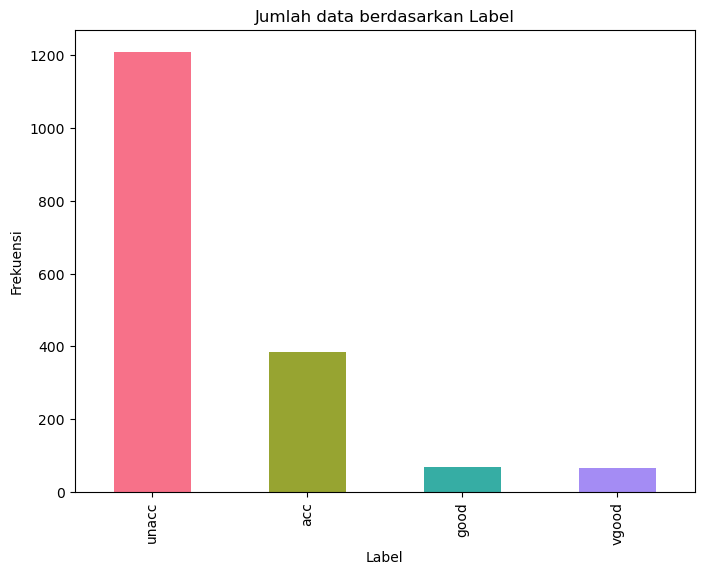

In [4]:
label_column = 'label'
# Hitung frekuensi setiap label
label_counts = df[label_column].value_counts()
palette = sns.color_palette("husl", len(label_counts))
# Buat diagram distribusi label
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Jumlah data berdasarkan Label')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.show()

**Melihat jumlah data berdasarkan label**

In [5]:
#cek jumlah data tiap kelas
df['label'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: label, dtype: int64

## *Pre-Processing*

**One-hot Encoding**

karna data yang kita miliki adalah data kategorikal maka data akan dilakukan normalisasi dengan one-hot encoding. One-hot encoding adalah teknik representasi data kategorikal dalam bentuk vektor biner, di mana hanya satu bit bernilai 1 sedangkan yang lainnya bernilai 0. Ini digunakan ketika kita memiliki variabel kategorikal dan ingin mengonversinya menjadi bentuk yang dapat digunakan oleh model machine learning yang memerlukan input numerik.

Contoh one-hot encoding:
Jika kita memiliki variabel kategorikal "Warna" dengan nilai {Merah, Hijau, Biru}, maka setelah one-hot encoding, setiap nilai akan direpresentasikan sebagai vektor biner:

Merah: [1, 0, 0]
Hijau: [0, 1, 0]
Biru: [0, 0, 1]

**Melakukan drop pada kolom label karna kolom label tidak akan dilakukan normalisasi one-hot encoding**

In [6]:
#tidak akan melakukan one-hot encoding pada data label
label=['label']
df_label= df[label]
df = df.drop(columns=label)

**Melakukan normaliasi pada fitur serta menambahkan kembali data label**

In [7]:
# Melakukan One-Hot Encoding pada semua kolom
df_encoded = pd.get_dummies(df)
# Menggabungkan DataFrame hasil One-Hot Encoding dengan label
df_final = pd.concat([df_label, df_encoded], axis=1)

In [8]:
df_final

,label,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,vgood,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,unacc,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,good,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


**Melihat data kolom terbaru setelah normalisasi**

In [9]:
df_final.columns.tolist()

['label',
 'buying_high',
 'buying_low',
 'buying_med',
 'buying_vhigh',
 'maint_high',
 'maint_low',
 'maint_med',
 'maint_vhigh',
 'doors_2',
 'doors_3',
 'doors_4',
 'doors_5more',
 'persons_2',
 'persons_4',
 'persons_more',
 'lug_boot_big',
 'lug_boot_med',
 'lug_boot_small',
 'safety_high',
 'safety_low',
 'safety_med']

**SPLIT DATA**

In [10]:
y = df_final['label']
X = df_final.drop('label', axis=1)

In [11]:
# Import library untuk membagi dataset
# Memisahkan dataset menjadi data pelatihan dan data uji
# X adalah matriks fitur, y adalah vektor target
# test_size=0.2 menunjukkan bahwa 20% dari data akan digunakan sebagai data uji
# random_state=42 memastikan hasil yang konsisten setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **PEMODELAN**

Metode yang digunakan adalah naive bayes multinomial, karna data yang digunakan data kategorikal.<br>
Naive Bayes adalah sebuah kelas algoritma pembelajaran mesin yang berbasis pada teorema Bayes. Algoritma ini diklasifikasikan sebagai "naive" karena mempertimbangkan asumsi sederhana yang disebut "naive assumption" atau "asumsi naif". Asumsi ini adalah bahwa setiap fitur dalam dataset adalah independen, artinya nilai dari satu fitur tidak tergantung pada nilai fitur-fitur lainnya, walaupun kenyataannya tidak selalu benar.

Meskipun asumsi ini terkadang terlalu sederhana untuk menggambarkan hubungan di dunia nyata, algoritma Naive Bayes telah terbukti efektif dalam berbagai tugas klasifikasi, terutama dalam kasus ketika dataset memiliki dimensi tinggi dan asumsi kemandirian fitur dapat diterima.

## *PEMODELAN Tanpa Over Sampling*

In [12]:
model1 = MultinomialNB()
model1.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_predi = model1.predict(X_test)

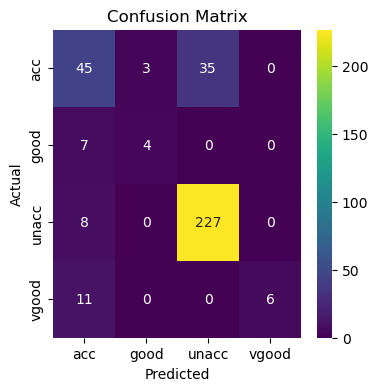

In [14]:
# Menghitung confusion matrix
cm1 = confusion_matrix(y_test, y_predi)
# Visualisasi confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap="viridis", xticklabels=model1.classes_, yticklabels=model1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [15]:
accuracy1 = accuracy_score(y_test, y_predi)
print(f'Accuracy: {accuracy1}')

Accuracy: 0.815028901734104


## *PEMODELAN Dengan Over Sampling*

Oversampling adalah salah satu teknik dalam pemrosesan data pada pembelajaran mesin yang digunakan untuk menangani ketidakseimbangan kelas atau distribusi tidak merata dari kategori target dalam dataset. Ketidakseimbangan kelas terjadi ketika satu atau beberapa kelas dalam dataset memiliki jumlah sampel yang jauh lebih sedikit dibandingkan kelas lainnya. Ini dapat mempengaruhi kinerja model pembelajaran mesin, terutama ketika model cenderung mendominasi kelas mayoritas dan mengabaikan kelas minoritas. Oversampling melibatkan peningkatan jumlah sampel dalam kelas minoritas dengan cara menambahkan duplikat dari sampel-sampel yang sudah ada atau dengan membuat sampel baru yang serupa dengan yang sudah ada. teknik yang digunakan pada penelitian ini adalah SMOTE. SMOTE, atau Synthetic Minority Over-sampling Technique, adalah metode oversampling yang dirancang untuk menangani ketidakseimbangan kelas dalam dataset dengan membuat sampel sintetis baru di antara sampel-sampel yang sudah ada dalam kelas minoritas. Ide dasarnya adalah untuk menciptakan variasi lebih lanjut dalam data kelas minoritas dengan cara menciptakan sampel baru yang merupakan kombinasi linier dari sampel-sampel yang sudah ada.

In [16]:
# Import library untuk menggunakan SMOTE
from imblearn.over_sampling import SMOTE

# Menampilkan jumlah sampel untuk setiap kelas sebelum penerapan SMOTE
print("\nbefore SMOTE:")
print(y_train.value_counts())

# Inisialisasi objek SMOTE dengan parameter tertentu
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Melakukan oversampling menggunakan metode SMOTE pada data pelatihan
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan jumlah sampel untuk setiap kelas setelah penerapan SMOTE
print("\nafter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


before SMOTE:
unacc    975
acc      301
good      58
vgood     48
Name: label, dtype: int64

after SMOTE:
unacc    975
acc      975
vgood    975
good     975
Name: label, dtype: int64


In [17]:
model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [18]:
y_pred = model.predict(X_test)

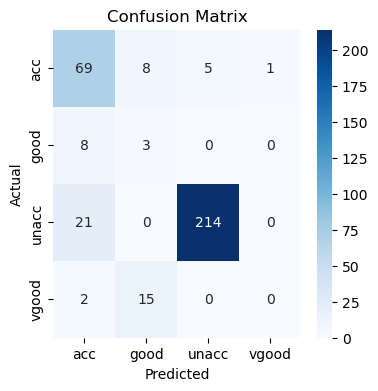

In [19]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualisasi confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8265895953757225


# **Kesimpulan**

1. Didapatkan hasil akurasi sebesar 81.5% untuk pemodelan tanpa oversampling, sedangkan dengan oversampling didapatkan hasil akurasi sebesar 82.6%
2. faktor keseimbangan jumlah data mempengaruhi hasil akurasi yang didapatkan.

In [21]:
import pickle
with open('car_naive.pkl', 'wb') as file:
    pickle.dump(model, file)